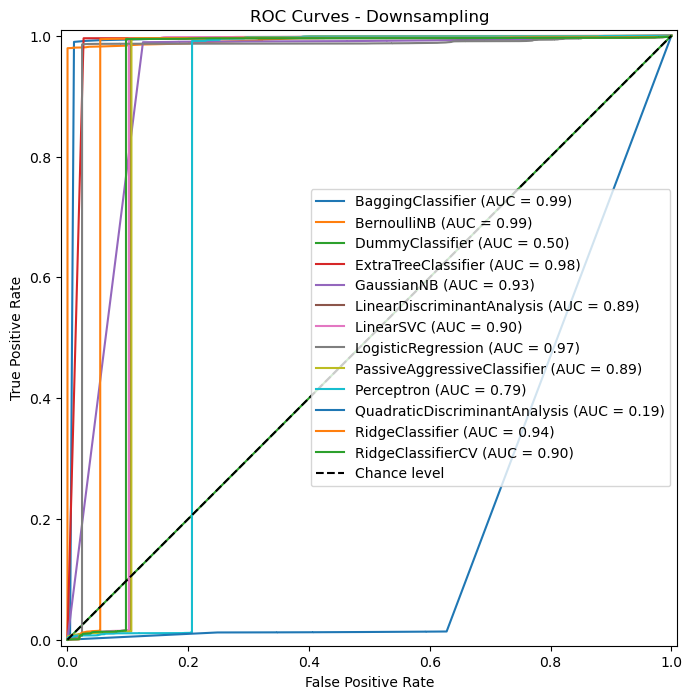

TypeError: PrecisionRecallDisplay.from_predictions() takes 3 positional arguments but 4 positional arguments (and 2 keyword-only arguments) were given

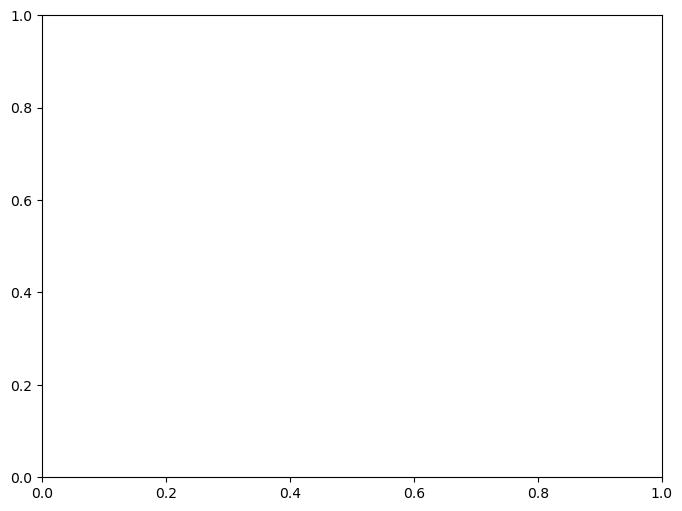

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

# model list: 
model_names = ['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB', 'CalibratedClassifierCV',
               'CategoricalNB', 'DecisionTreeClassifier', 'DummyClassifier', 'ExtraTreeClassifier', 
                'ExtraTreesClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis',
                'LinearSVC', 'LogisticRegression', 'NearestCentroid', 'PassiveAggressiveClassifier', 
                'Perceptron', 'QuadraticDiscriminantAnalysis', 'RandomForestClassifier', 'RidgeClassifier', 
                'RidgeClassifierCV', 'SGDClassifier', 'XGBClassifier', 'LGBMClassifier']

names = ['BaggingClassifier', 'BernoulliNB', 'ExtraTreeClassifier', 'GaussianNB', 'LinearDiscriminantAnalysis',
         'LinearSVC', 'LogisticRegression', 'PassiveAggressiveClassifier', 'Perceptron', 'QuadraticDiscriminantAnalysis', 'RidgeClassifier', 'RidgeClassifierCV','DummyClassifier']
# Function to load the saved model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load model results
model_filename = '/home/ndo/vardict_ML/models_output/SL_19_models_normalized_crossVal.pkl'
models = load_model(model_filename)

# Load test set:
df = pd.read_parquet('/home/ndo/vardict_ML/process_test_106_normalized_dataset.parquet')
# Define X (features) and y (target)
df.dropna(subset=['labels'], inplace=True)
X_test = df.drop(columns=['labels'])  # Features
y_test = df['labels']  # Target labels

from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for name, model in models.items():
    if name in names:
        model = models[name]['model']
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())


plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Downsampling')
plt.legend()
plt.show()

# from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
# import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 6))
# for model_name in models.keys():
#     if model_name in names:
#         model = models[model_name]['model']
#         PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name=model_name, ax=plt.gca())

# plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('PR curves - Downsampling')
# plt.legend()
# plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.utils import resample
# Import your classifiers
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, RidgeClassifierCV, SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Load test set:
df = pd.read_parquet('/home/ndo/vardict_ML/process_test_106_normalized_dataset.parquet')
# Define X (features) and y (target)
df.dropna(subset=['labels'], inplace=True)
X_test = df.drop(columns=['labels'])  # Features
y_test = df['labels']  # Target labels

# Load the model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load your AdaBoostClassifier model from the pickle file
model_filename = '/home/ndo/vardict_ML/models_output/SL_19_models_normalized_crossVal.pkl'
models = load_model(model_filename)

model_metrics = {}
# Loop through each classifier and evaluate
for name, results in models.items():
    model = results['model']
    try:  
        y_pred = model.predict(X_test)

        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        # Calculate AUC-ROC
        # Use the decision_function to get raw scores (not probabilities)
        y_scores = model.decision_function(X_test)

        # Calculate the AUC-ROC score
        auc_score = roc_auc_score(y_test, y_scores)
        print(f"AUC-ROC score: {auc_score}")
        
        # Store results
        model_metrics[name] = {'Accuracy': acc, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'AUC-ROC': auc_score}

        # Print metrics
        print(f"{name}: Accuracy = {acc:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-score = {f1:.4f}, AUC-ROC = {auc_score:.4f}")
        

    except Exception as e:
        print(f"Failed to run {name}: {e}")



AUC-ROC score: 0.9997161177826032
AdaBoostClassifier: Accuracy = 0.9969, Precision = 0.9970, Recall = 0.9969, F1-score = 0.9969, AUC-ROC = 0.9997
Failed to run BaggingClassifier: This 'BaggingClassifier' has no attribute 'decision_function'
Failed to run BernoulliNB: 'BernoulliNB' object has no attribute 'decision_function'
Failed to run CalibratedClassifierCV: 'CalibratedClassifierCV' object has no attribute 'decision_function'
Failed to run CategoricalNB: index 1 is out of bounds for axis 1 with size 1
Failed to run DecisionTreeClassifier: 'DecisionTreeClassifier' object has no attribute 'decision_function'


/home/ndo/miniconda3/envs/notebook/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Failed to run DummyClassifier: 'DummyClassifier' object has no attribute 'decision_function'
Failed to run ExtraTreeClassifier: 'ExtraTreeClassifier' object has no attribute 'decision_function'
Failed to run ExtraTreesClassifier: 'ExtraTreesClassifier' object has no attribute 'decision_function'
Failed to run GaussianNB: 'GaussianNB' object has no attribute 'decision_function'
AUC-ROC score: 0.8929060256139423
LinearDiscriminantAnalysis: Accuracy = 0.9787, Precision = 0.9781, Recall = 0.9787, F1-score = 0.9779, AUC-ROC = 0.8929
AUC-ROC score: 0.8986263443244205
LinearSVC: Accuracy = 0.9650, Precision = 0.9652, Recall = 0.9650, F1-score = 0.9613, AUC-ROC = 0.8986
AUC-ROC score: 0.9661797887436082
LogisticRegression: Accuracy = 0.0855, Precision = 0.7759, Recall = 0.0855, F1-score = 0.0140, AUC-ROC = 0.9662
AUC-ROC score: 0.8939229284106684
PassiveAggressiveClassifier: Accuracy = 0.9720, Precision = 0.9716, Recall = 0.9720, F1-score = 0.9701, AUC-ROC = 0.8939
AUC-ROC score: 0.79439826004

In [3]:
model_metrics

{'AdaBoostClassifier': {'Accuracy': 0.996933019876941,
  'Precision': 0.9969560279017787,
  'Recall': 0.996933019876941,
  'F1-score': 0.9969412810606771,
  'AUC-ROC': 0.9997161177826032},
 'LinearDiscriminantAnalysis': {'Accuracy': 0.9786655276751279,
  'Precision': 0.9781216219234646,
  'Recall': 0.9786655276751279,
  'F1-score': 0.9779174613923148,
  'AUC-ROC': 0.8929060256139423},
 'LinearSVC': {'Accuracy': 0.9650318106430462,
  'Precision': 0.9652324156325445,
  'Recall': 0.9650318106430462,
  'F1-score': 0.9613112601929445,
  'AUC-ROC': 0.8986263443244205},
 'LogisticRegression': {'Accuracy': 0.08547607577293129,
  'Precision': 0.7758793671185867,
  'Recall': 0.08547607577293129,
  'F1-score': 0.013956087875101856,
  'AUC-ROC': 0.9661797887436082},
 'PassiveAggressiveClassifier': {'Accuracy': 0.9720132951163498,
  'Precision': 0.971575672294943,
  'Recall': 0.9720132951163498,
  'F1-score': 0.9700951127199252,
  'AUC-ROC': 0.8939229284106684},
 'Perceptron': {'Accuracy': 0.971083

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.utils import resample
# Import your classifiers
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, RidgeClassifierCV, SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Load test set:
df = pd.read_parquet('/home/ndo/vardict_ML/process_test_106_normalized_dataset.parquet')
# Define X (features) and y (target)
df.dropna(subset=['labels'], inplace=True)
X_test = df.drop(columns=['labels'])  # Features
y_test = df['labels']  # Target labels

# Load the model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load your AdaBoostClassifier model from the pickle file
model_filename = '/home/ndo/vardict_ML/models_output/SL_19_models_normalized_crossVal.pkl'
models = load_model(model_filename)


# Loop through each classifier and evaluate
for name, results in models.items():
    if name in model_metrics: continue
    model = results['model']
    try:  
        y_pred = model.predict(X_test)

        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        # Calculate AUC-ROC
        # Use the decision_function to get raw scores (not probabilities)
        # y_scores = model.decision_function(X_test)

        # # Calculate the AUC-ROC score
        # auc_score = roc_auc_score(y_test, y_scores)
        # print(f"AUC-ROC score: {auc_score}")
        
        # Check if the model supports predict_proba
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]  # Get the probability for the positive class
            
            # Calculate the AUC-ROC score
            auc_score = roc_auc_score(y_test, y_scores)
            print(f"AUC-ROC score: {auc_score}")
        # Store results
        model_metrics[name] = {'Accuracy': acc, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'AUC-ROC': auc_score}

        # Print metrics
        print(f"{name}: Accuracy = {acc:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-score = {f1:.4f}, AUC-ROC = {auc_score:.4f}")
        

    except Exception as e:
        print(f"Failed to run {name}: {e}")

AUC-ROC score: 0.989627918121593
BaggingClassifier: Accuracy = 0.9864, Precision = 0.9863, Recall = 0.9864, F1-score = 0.9863, AUC-ROC = 0.9896
AUC-ROC score: 0.9946876721380176
BernoulliNB: Accuracy = 0.9811, Precision = 0.9845, Recall = 0.9811, F1-score = 0.9819, AUC-ROC = 0.9947
AUC-ROC score: 0.8918377312348785
CalibratedClassifierCV: Accuracy = 0.9650, Precision = 0.9652, Recall = 0.9650, F1-score = 0.9613, AUC-ROC = 0.8918
Failed to run CategoricalNB: index 1 is out of bounds for axis 1 with size 1
AUC-ROC score: 0.9594055790398195
DecisionTreeClassifier: Accuracy = 0.9865, Precision = 0.9866, Recall = 0.9865, F1-score = 0.9865, AUC-ROC = 0.9594


/home/ndo/miniconda3/envs/notebook/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AUC-ROC score: 0.5
DummyClassifier: Accuracy = 0.0852, Precision = 0.0073, Recall = 0.0852, F1-score = 0.0134, AUC-ROC = 0.5000
AUC-ROC score: 0.9842434309138552
ExtraTreeClassifier: Accuracy = 0.9940, Precision = 0.9940, Recall = 0.9940, F1-score = 0.9940, AUC-ROC = 0.9842
AUC-ROC score: 0.9979789898997271
ExtraTreesClassifier: Accuracy = 0.9951, Precision = 0.9951, Recall = 0.9951, F1-score = 0.9951, AUC-ROC = 0.9980
AUC-ROC score: 0.930817529565132
GaussianNB: Accuracy = 0.9754, Precision = 0.9747, Recall = 0.9754, F1-score = 0.9749, AUC-ROC = 0.9308
AUC-ROC score: 0.9992459028069096
RandomForestClassifier: Accuracy = 0.9939, Precision = 0.9941, Recall = 0.9939, F1-score = 0.9940, AUC-ROC = 0.9992
AUC-ROC score: 0.9990587236161672
XGBClassifier: Accuracy = 0.9937, Precision = 0.9939, Recall = 0.9937, F1-score = 0.9938, AUC-ROC = 0.9991
AUC-ROC score: 0.9989829989722625
LGBMClassifier: Accuracy = 0.9938, Precision = 0.9940, Recall = 0.9938, F1-score = 0.9939, AUC-ROC = 0.9990


In [9]:
model_metrics

{'AdaBoostClassifier': {'Accuracy': 0.996933019876941,
  'Precision': 0.9969560279017787,
  'Recall': 0.996933019876941,
  'F1-score': 0.9969412810606771,
  'AUC-ROC': 0.9997161177826032},
 'LinearDiscriminantAnalysis': {'Accuracy': 0.9786655276751279,
  'Precision': 0.9781216219234646,
  'Recall': 0.9786655276751279,
  'F1-score': 0.9779174613923148,
  'AUC-ROC': 0.8929060256139423},
 'LinearSVC': {'Accuracy': 0.9650318106430462,
  'Precision': 0.9652324156325445,
  'Recall': 0.9650318106430462,
  'F1-score': 0.9613112601929445,
  'AUC-ROC': 0.8986263443244205},
 'LogisticRegression': {'Accuracy': 0.08547607577293129,
  'Precision': 0.7758793671185867,
  'Recall': 0.08547607577293129,
  'F1-score': 0.013956087875101856,
  'AUC-ROC': 0.9661797887436082},
 'PassiveAggressiveClassifier': {'Accuracy': 0.9720132951163498,
  'Precision': 0.971575672294943,
  'Recall': 0.9720132951163498,
  'F1-score': 0.9700951127199252,
  'AUC-ROC': 0.8939229284106684},
 'Perceptron': {'Accuracy': 0.971083

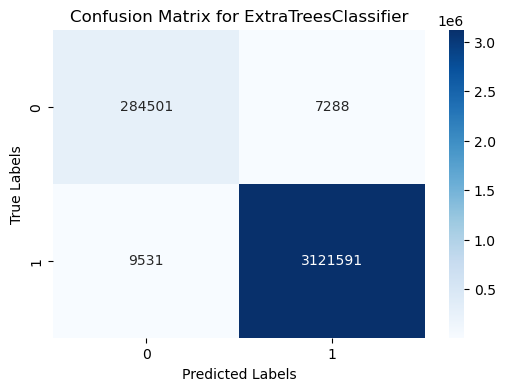

In [9]:
import pickle
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# model list: 
# Your list of model names
names = ['BaggingClassifier', 'BernoulliNB', 'ExtraTreeClassifier', 'GaussianNB', 'LinearDiscriminantAnalysis',
         'LinearSVC', 'LogisticRegression', 'PassiveAggressiveClassifier', 'Perceptron', 'QuadraticDiscriminantAnalysis', 
         'RidgeClassifier', 'RidgeClassifierCV', 'DummyClassifier']
top_models = ['ExtraTreesClassifier', 'AdaboostClassifier']
# Function to load the saved model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load model results
model_filename = '/home/ndo/vardict_ML/models_output/SL_19_models_normalized_crossVal.pkl'
models = load_model(model_filename)

# Load test set:
df = pd.read_parquet('/home/ndo/vardict_ML/process_test_106_normalized_dataset.parquet')

# Define X (features) and y (target)
df.dropna(subset=['labels'], inplace=True)
X_test = df.drop(columns=['labels'])  # Features
y_test = df['labels']  # Target labels
name = 'ExtraTreesClassifier'
model = models[name]['model']
y_pred = model.predict(X_test)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for {name}')
plt.show()


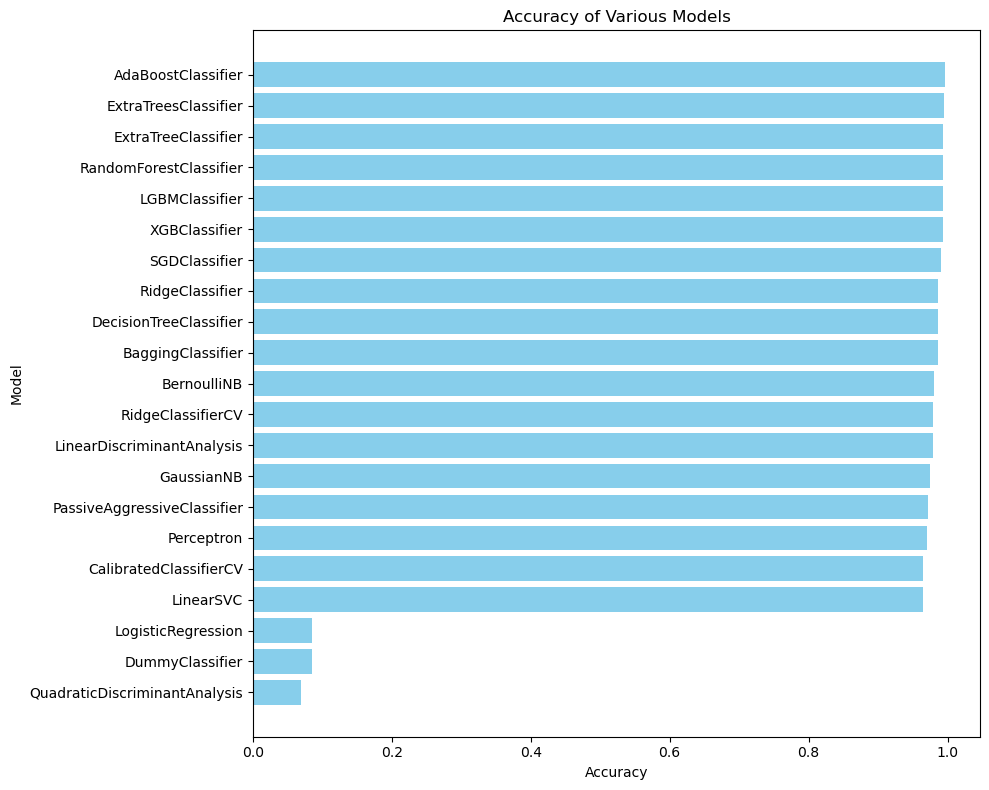

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Data (model_metrics dictionary)
model_metrics = {'AdaBoostClassifier': {'Accuracy': 0.996933019876941, 'Precision': 0.9969560279017787, 'Recall': 0.996933019876941, 'F1-score': 0.9969412810606771, 'AUC-ROC': 0.9997161177826032},
 'LinearDiscriminantAnalysis': {'Accuracy': 0.9786655276751279, 'Precision': 0.9781216219234646, 'Recall': 0.9786655276751279, 'F1-score': 0.9779174613923148, 'AUC-ROC': 0.8929060256139423},
 'LinearSVC': {'Accuracy': 0.9650318106430462, 'Precision': 0.9652324156325445, 'Recall': 0.9650318106430462, 'F1-score': 0.9613112601929445, 'AUC-ROC': 0.8986263443244205},
 'LogisticRegression': {'Accuracy': 0.08547607577293129, 'Precision': 0.7758793671185867, 'Recall': 0.08547607577293129, 'F1-score': 0.013956087875101856, 'AUC-ROC': 0.9661797887436082},
 'PassiveAggressiveClassifier': {'Accuracy': 0.9720132951163498, 'Precision': 0.971575672294943, 'Recall': 0.9720132951163498, 'F1-score': 0.9700951127199252, 'AUC-ROC': 0.8939229284106684},
 'Perceptron': {'Accuracy': 0.9710836770222773, 'Precision': 0.9703421283276716, 'Recall': 0.9710836770222773, 'F1-score': 0.9692235302354918, 'AUC-ROC': 0.7943982600472297},
 'QuadraticDiscriminantAnalysis': {'Accuracy': 0.06896848910182006, 'Precision': 0.268504439825317, 'Recall': 0.06896848910182006, 'F1-score': 0.030640077324450416, 'AUC-ROC': 0.2634707198553299},
 'RidgeClassifier': {'Accuracy': 0.9870282925848788, 'Precision': 0.9868414583790157, 'Recall': 0.9870282925848788, 'F1-score': 0.9868815636761498, 'AUC-ROC': 0.9431180369491611},
 'RidgeClassifierCV': {'Accuracy': 0.9786871467005716, 'Precision': 0.9781464775286638, 'Recall': 0.9786871467005716, 'F1-score': 0.9779367969525048, 'AUC-ROC': 0.9005300025277857},
 'SGDClassifier': {'Accuracy': 0.9911148726916943, 'Precision': 0.9910375086015545, 'Recall': 0.9911148726916943, 'F1-score': 0.9909843887323593, 'AUC-ROC': 0.9523101778544653},
 'BaggingClassifier': {'Accuracy': 0.9863937449732114, 'Precision': 0.9862986561462421, 'Recall': 0.9863937449732114, 'F1-score': 0.9863395724419336, 'AUC-ROC': 0.989627918121593},
 'BernoulliNB': {'Accuracy': 0.9811137362321135, 'Precision': 0.9844902020620511, 'Recall': 0.9811137362321135, 'F1-score': 0.9819491922382989, 'AUC-ROC': 0.9946876721380176},
 'CalibratedClassifierCV': {'Accuracy': 0.9650411594108056, 'Precision': 0.9652161690038186, 'Recall': 0.9650411594108056, 'F1-score': 0.9613352297290079, 'AUC-ROC': 0.8918377312348785},
 'DecisionTreeClassifier': {'Accuracy': 0.9864945363756171, 'Precision': 0.9865985076011425, 'Recall': 0.9864945363756171, 'F1-score': 0.9865414351594697, 'AUC-ROC': 0.9594055790398195},
 'DummyClassifier': {'Accuracy': 0.08524586236685675, 'Precision': 0.007266857050669083, 'Recall': 0.08524586236685675, 'F1-score': 0.013392093538731399, 'AUC-ROC': 0.5},
 'ExtraTreeClassifier': {'Accuracy': 0.9939656625603178, 'Precision': 0.9940259030775349, 'Recall': 0.9939656625603178, 'F1-score': 0.99398912640096, 'AUC-ROC': 0.9842434309138552},
 'ExtraTreesClassifier': {'Accuracy': 0.9950863460954725, 'Precision': 0.9951060608746699, 'Recall': 0.9950863460954725, 'F1-score': 0.9950948725329465, 'AUC-ROC': 0.9979789898997271},
 'GaussianNB': {'Accuracy': 0.9753738849768516, 'Precision': 0.9747432207283964, 'Recall': 0.9753738849768516, 'F1-score': 0.9749379756826589, 'AUC-ROC': 0.930817529565132},
 'RandomForestClassifier': {'Accuracy': 0.9939308968302126, 'Precision': 0.9941307338751505, 'Recall': 0.9939308968302126, 'F1-score': 0.9939895062550788, 'AUC-ROC': 0.9992459028069096},
 'XGBClassifier': {'Accuracy': 0.9937012677221231, 'Precision': 0.9938892833135252, 'Recall': 0.9937012677221231, 'F1-score': 0.9937586200416472, 'AUC-ROC': 0.9990587236161672},
 'LGBMClassifier': {'Accuracy': 0.9938213409580325, 'Precision': 0.9939772263301532, 'Recall': 0.9938213409580325, 'F1-score': 0.9938708790756313, 'AUC-ROC': 0.9989829989722625}}

# Extract model names and accuracies
model_names = list(model_metrics.keys())
accuracies = [metrics['Accuracy'] for metrics in model_metrics.values()]

# Create a dataframe for easy plotting
df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Sort by accuracy (optional)
df = df.sort_values(by='Accuracy', ascending=True)

# Plotting the bar plot
plt.figure(figsize=(10, 8))
plt.barh(df['Model'], df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy of Various Models')
plt.tight_layout()
plt.show()


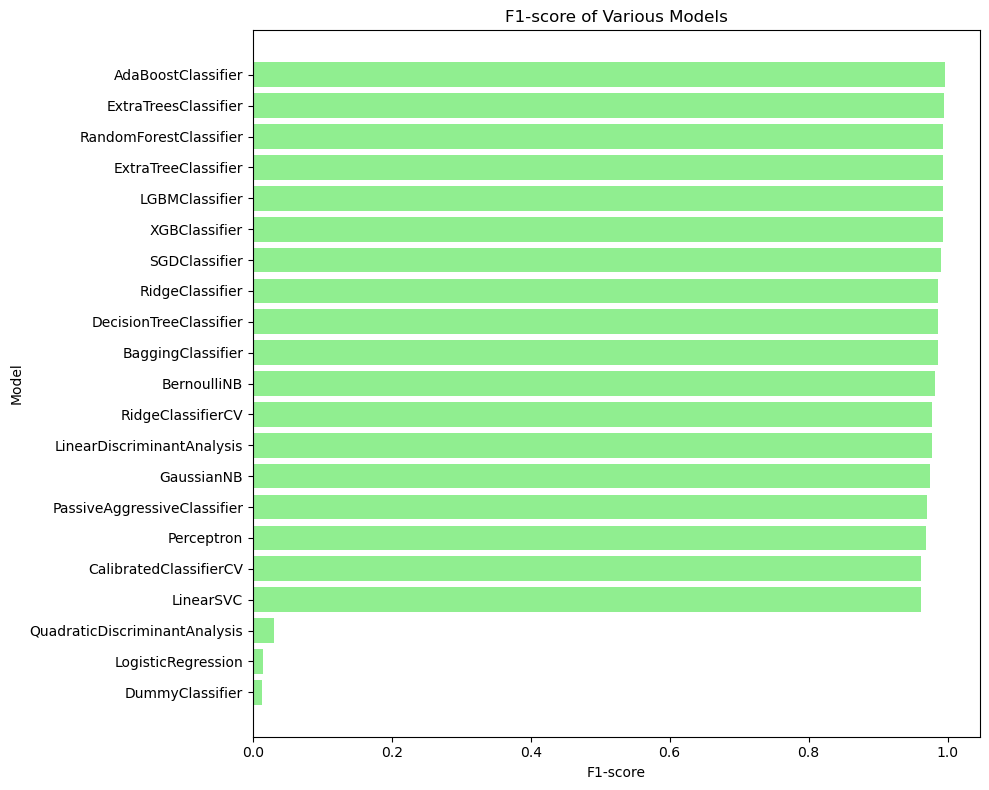

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Data (model_metrics dictionary)
model_metrics = {'AdaBoostClassifier': {'Accuracy': 0.996933019876941, 'Precision': 0.9969560279017787, 'Recall': 0.996933019876941, 'F1-score': 0.9969412810606771, 'AUC-ROC': 0.9997161177826032},
 'LinearDiscriminantAnalysis': {'Accuracy': 0.9786655276751279, 'Precision': 0.9781216219234646, 'Recall': 0.9786655276751279, 'F1-score': 0.9779174613923148, 'AUC-ROC': 0.8929060256139423},
 'LinearSVC': {'Accuracy': 0.9650318106430462, 'Precision': 0.9652324156325445, 'Recall': 0.9650318106430462, 'F1-score': 0.9613112601929445, 'AUC-ROC': 0.8986263443244205},
 'LogisticRegression': {'Accuracy': 0.08547607577293129, 'Precision': 0.7758793671185867, 'Recall': 0.08547607577293129, 'F1-score': 0.013956087875101856, 'AUC-ROC': 0.9661797887436082},
 'PassiveAggressiveClassifier': {'Accuracy': 0.9720132951163498, 'Precision': 0.971575672294943, 'Recall': 0.9720132951163498, 'F1-score': 0.9700951127199252, 'AUC-ROC': 0.8939229284106684},
 'Perceptron': {'Accuracy': 0.9710836770222773, 'Precision': 0.9703421283276716, 'Recall': 0.9710836770222773, 'F1-score': 0.9692235302354918, 'AUC-ROC': 0.7943982600472297},
 'QuadraticDiscriminantAnalysis': {'Accuracy': 0.06896848910182006, 'Precision': 0.268504439825317, 'Recall': 0.06896848910182006, 'F1-score': 0.030640077324450416, 'AUC-ROC': 0.2634707198553299},
 'RidgeClassifier': {'Accuracy': 0.9870282925848788, 'Precision': 0.9868414583790157, 'Recall': 0.9870282925848788, 'F1-score': 0.9868815636761498, 'AUC-ROC': 0.9431180369491611},
 'RidgeClassifierCV': {'Accuracy': 0.9786871467005716, 'Precision': 0.9781464775286638, 'Recall': 0.9786871467005716, 'F1-score': 0.9779367969525048, 'AUC-ROC': 0.9005300025277857},
 'SGDClassifier': {'Accuracy': 0.9911148726916943, 'Precision': 0.9910375086015545, 'Recall': 0.9911148726916943, 'F1-score': 0.9909843887323593, 'AUC-ROC': 0.9523101778544653},
 'BaggingClassifier': {'Accuracy': 0.9863937449732114, 'Precision': 0.9862986561462421, 'Recall': 0.9863937449732114, 'F1-score': 0.9863395724419336, 'AUC-ROC': 0.989627918121593},
 'BernoulliNB': {'Accuracy': 0.9811137362321135, 'Precision': 0.9844902020620511, 'Recall': 0.9811137362321135, 'F1-score': 0.9819491922382989, 'AUC-ROC': 0.9946876721380176},
 'CalibratedClassifierCV': {'Accuracy': 0.9650411594108056, 'Precision': 0.9652161690038186, 'Recall': 0.9650411594108056, 'F1-score': 0.9613352297290079, 'AUC-ROC': 0.8918377312348785},
 'DecisionTreeClassifier': {'Accuracy': 0.9864945363756171, 'Precision': 0.9865985076011425, 'Recall': 0.9864945363756171, 'F1-score': 0.9865414351594697, 'AUC-ROC': 0.9594055790398195},
 'DummyClassifier': {'Accuracy': 0.08524586236685675, 'Precision': 0.007266857050669083, 'Recall': 0.08524586236685675, 'F1-score': 0.013392093538731399, 'AUC-ROC': 0.5},
 'ExtraTreeClassifier': {'Accuracy': 0.9939656625603178, 'Precision': 0.9940259030775349, 'Recall': 0.9939656625603178, 'F1-score': 0.99398912640096, 'AUC-ROC': 0.9842434309138552},
 'ExtraTreesClassifier': {'Accuracy': 0.9950863460954725, 'Precision': 0.9951060608746699, 'Recall': 0.9950863460954725, 'F1-score': 0.9950948725329465, 'AUC-ROC': 0.9979789898997271},
 'GaussianNB': {'Accuracy': 0.9753738849768516, 'Precision': 0.9747432207283964, 'Recall': 0.9753738849768516, 'F1-score': 0.9749379756826589, 'AUC-ROC': 0.930817529565132},
 'RandomForestClassifier': {'Accuracy': 0.9939308968302126, 'Precision': 0.9941307338751505, 'Recall': 0.9939308968302126, 'F1-score': 0.9939895062550788, 'AUC-ROC': 0.9992459028069096},
 'XGBClassifier': {'Accuracy': 0.9937012677221231, 'Precision': 0.9938892833135252, 'Recall': 0.9937012677221231, 'F1-score': 0.9937586200416472, 'AUC-ROC': 0.9990587236161672},
 'LGBMClassifier': {'Accuracy': 0.9938213409580325, 'Precision': 0.9939772263301532, 'Recall': 0.9938213409580325, 'F1-score': 0.9938708790756313, 'AUC-ROC': 0.9989829989722625}}

# Extract model names and F1-scores
model_names = list(model_metrics.keys())
f1_scores = [metrics['F1-score'] for metrics in model_metrics.values()]

# Create a dataframe for easy plotting
df = pd.DataFrame({'Model': model_names, 'F1-score': f1_scores})

# Sort by F1-score (optional)
df = df.sort_values(by='F1-score', ascending=True)

# Plotting the bar plot
plt.figure(figsize=(10, 8))
plt.barh(df['Model'], df['F1-score'], color='lightgreen')
plt.xlabel('F1-score')
plt.ylabel('Model')
plt.title('F1-score of Various Models')
plt.tight_layout()
plt.show()


In [2]:
models

{'AdaBoostClassifier': {'model': AdaBoostClassifier(),
  'cv_scores': array([0.99391093, 0.99384112, 0.99380723, 0.99380199, 0.99395611]),
  'cv_mean_score': 0.9938634772116837,
  'cv_std_dev': 6.045892373831023e-05},
 'BaggingClassifier': {'model': BaggingClassifier(),
  'cv_scores': array([0.99541907, 0.99536097, 0.99539285, 0.99544288, 0.99545619]),
  'cv_mean_score': 0.995414392004713,
  'cv_std_dev': 3.434579504316022e-05},
 'BernoulliNB': {'model': BernoulliNB(),
  'cv_scores': array([0.98834676, 0.9883052 , 0.98821442, 0.98832658, 0.98826929]),
  'cv_mean_score': 0.9882924492677125,
  'cv_std_dev': 4.66953681096405e-05},
 'CalibratedClassifierCV': {'model': CalibratedClassifierCV(),
  'cv_scores': array([0.94000818, 0.94000937, 0.93981006, 0.94014614, 0.94010015]),
  'cv_mean_score': 0.9400147796859049,
  'cv_std_dev': 0.0001153499082079032},
 'CategoricalNB': {'model': CategoricalNB(),
  'cv_scores': array([0.99011272, 0.99010021, 0.99011998,        nan, 0.99012764]),
  'cv_mea

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load model results
PP_filename = '/home/ndo/vardict_ML/models_output/predictive_power.pkl'
PP = load_model(PP_filename)


In [3]:
PP

{'DP': {'Accuracy': 0.9967253019432875,
  'Precision': 0.9989224892704687,
  'Recall': 0.9974961052300102},
 'VD': {'Accuracy': 0.9968553082449412,
  'Precision': 0.9990934176491174,
  'Recall': 0.9974673615400486},
 'AF': {'Accuracy': 0.9969537624554071,
  'Precision': 0.9986568027046746,
  'Recall': 0.9980122141519877},
 'PMEAN': {'Accuracy': 0.9969987534002491,
  'Precision': 0.9988379598090737,
  'Recall': 0.9978799931781642},
 'PSTD': {'Accuracy': 0.9957016118736363,
  'Precision': 0.9995729500399638,
  'Recall': 0.9957264520513732},
 'QUAL': {'Accuracy': 0.9969920339734221,
  'Precision': 0.9988462438507898,
  'Recall': 0.9978643438358518},
 'QSTD': {'Accuracy': 0.996933019876941,
  'Precision': 0.9988796635921362,
  'Recall': 0.9977662959156494},
 'SBF': {'Accuracy': 0.9970823080120985,
  'Precision': 0.9987522943051376,
  'Recall': 0.9980572459329276},
 'ODDRATIO': {'Accuracy': 0.9968649491616931,
  'Precision': 0.9993064989719095,
  'Recall': 0.9972648782129856},
 'MQ': {'Accu

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_parquet('/home/ndo/vardict_ML/processed_data.parquet')

In [7]:
df = df[['SBF', 'ODDRATIO', 'labels']]
df['1 - SBF'] = 1 - df['SBF']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37098646 entries, 0 to 37098645
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   SBF       float64
 1   ODDRATIO  float64
 2   labels    int64  
 3   1 - SBF   float64
dtypes: float64(3), int64(1)
memory usage: 1.1 GB


/home/ndo/miniconda3/envs/notebook/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


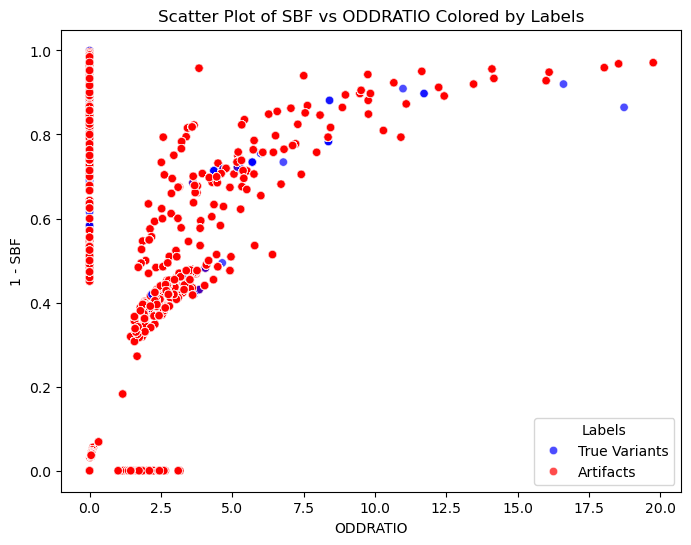

In [8]:
# Ensure there are no missing values in the relevant columns
df.dropna(subset=['1 - SBF', 'ODDRATIO', 'labels'], inplace=True)

# Map the labels 0 and 1 to 'True Variants' and 'Artifacts'
df['labels'] = df['labels'].map({0: 'True Variants', 1: 'Artifacts'})

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ODDRATIO', y='1 - SBF', hue='labels', data=df, palette={'True Variants': 'blue', 'Artifacts': 'red'}, alpha=0.7)

# Customize plot labels and title
plt.xlabel('ODDRATIO')
plt.ylabel('1 - SBF')
plt.title('Scatter Plot of SBF vs ODDRATIO Colored by Labels')
plt.legend(title='Labels')
plt.show()